In [5]:
import networkx as nx
from scipy import sparse
import igraph as ig
from bluepysnap import Circuit
import os
import numpy as np
import libsonata

In [6]:
circuitconfig_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/sonata/circuit_config.json'
node_pop_name = 'hippocampus_neurons'
edge_pop_name = 'hippocampus_neurons__hippocampus_neurons__chemical_synapse'

ca1_synaptome_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_synaptome.npz'
sc_synaptome_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca3_synaptome.npz'

In [7]:
c = Circuit(circuitconfig_path)
nodes = c.nodes[node_pop_name]
edges = c.edges[edge_pop_name]

In [8]:
node_set = 'cylinder300'
target_node_ids = nodes.ids(node_set)

In [9]:
ca1_synaptome = sparse.load_npz(ca1_synaptome_path)

In [10]:
node_features = nodes.property_names
edge_features = edges.property_names

In [105]:
edge_features

{'@source_node',
 '@target_node',
 'afferent_center_x',
 'afferent_center_y',
 'afferent_center_z',
 'afferent_section_id',
 'afferent_section_pos',
 'afferent_section_type',
 'afferent_segment_id',
 'afferent_segment_offset',
 'afferent_surface_x',
 'afferent_surface_y',
 'afferent_surface_z',
 'branch_order',
 'conductance',
 'conductance_scale_factor',
 'decay_time',
 'delay',
 'depression_time',
 'efferent_center_x',
 'efferent_center_y',
 'efferent_center_z',
 'efferent_section_id',
 'efferent_section_pos',
 'efferent_section_type',
 'efferent_segment_id',
 'efferent_segment_offset',
 'efferent_surface_x',
 'efferent_surface_y',
 'efferent_surface_z',
 'facilitation_time',
 'n_rrp_vesicles',
 'spine_length',
 'syn_property_rule',
 'syn_type_id',
 'synapse_id',
 'u_hill_coefficient',
 'u_syn'}

In [12]:
nodes_ls = libsonata.NodeStorage(c.config['networks']['nodes'][0]['nodes_file'])
edges_ls = libsonata.EdgeStorage(c.config['networks']['edges'][0]['edges_file'])

In [13]:
node_pop_ls = nodes_ls.open_population(node_pop_name)
edge_pop_ls = edges_ls.open_population(edge_pop_name)

In [14]:
import matplotlib.pyplot as plt

In [15]:
source_query = np.intersect1d(nodes.ids(node_set),nodes.ids('SLM_PPA'))
target_query = np.intersect1d(nodes.ids(node_set),nodes.ids('SP_PC'))
selected_edge_ids = edge_pop_ls.connecting_edges(source_query,target_query)

In [16]:
#selected_edge_ids.flatten()

In [17]:
# selection = libsonata.Selection(values=selected_edge_ids)  # nodes 1, 5, 9, 42
branch_orders = edge_pop_ls.get_attribute('branch_order', selected_edge_ids)

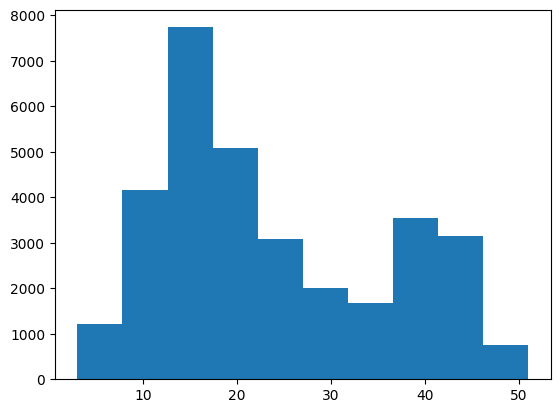

In [18]:
_=plt.hist(branch_orders)

In [19]:
node_selection = libsonata.Selection(values=nodes.ids(node_set))
target_mtypes = node_pop_ls.get_attribute('mtype',node_selection)

In [20]:
ca1_connectome = ca1_synaptome.copy()
ca1_connectome[ca1_connectome>1] = 1

In [21]:
matrices_dir = '/gpfs/bbp.cscs.ch/project/proj112/home/kurban/topology_paper/data'

In [22]:
feature_matrice_filenames = [i.strip('.npz') for i in os.listdir(matrices_dir) if i.endswith('.npz')]
feature_matrice_filenames 

['ca1_adj__n_rrp_vesicles',
 'ca1_adj__decay_time',
 'ca1_adj__depression_time',
 'ca1_adj__conductance_scale_factor',
 'ca1_adj__u_sy',
 'ca1_adj__facilitation_time',
 'ca1_adj__conductance',
 'ca1_adj__delay',
 'ca1_adj__u_hill_coefficient']

In [23]:
os.path.exists(f'{matrices_dir}/{feature_matrice_filenames[1]}.npz')

True

In [ ]:
def extract_group_level_matrix_features(adj_path,features):
    adj_feature = sparse.load_npz(adj_path)
    

In [95]:
import seaborn as sns
import pandas as pd

In [103]:
import plotly.express as px
import numpy as np

# Sample data (replace with your own NumPy array)
data = np.random.randn(1000)

# Create a histogram figure with Plotly Express
fig = px.histogram(data, nbins=20, labels={'value': 'X Label'}, title='Histogram Plot', opacity=0.7, histnorm='probability density')

# Customize the appearance
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1)

# Customize the layout
fig.update_layout(xaxis_title='X Label', yaxis_title='Frequency', legend_title='Data Distribution', showlegend=True, bargap=0.05)

# Save the figure as a publication-quality image (e.g., PNG, PDF, SVG)
fig.write_image("test_publication_histogram.png", width=800, height=600, scale=3)  # Change the file format and dimensions as needed


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [104]:
pip install kaleido

Looking in indexes: https://bbpteam.epfl.ch/repository/devpi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 71.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /gpfs/bbp.cscs.ch/home/kurban/venv2022/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
adj_dtc = sparse.load_npz(f'{matrices_dir}/{feature_matrice_filenames[1]}.npz')

In [25]:
adj_dtc_target = adj_dtc[target_node_ids,:][:,target_node_ids]

In [26]:
adj_dtc_target.mean()

0.2077937827933949

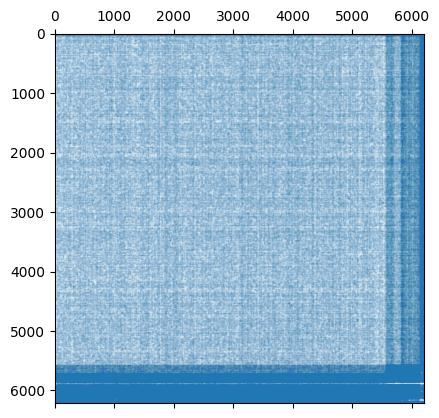

In [27]:
plt.spy(adj_dtc_target,markersize=0.01)

In [28]:
adj_dtc_target.shape

(6213, 6213)

In [29]:
g_dtc = nx.from_scipy_sparse_array(adj_dtc_target,create_using=nx.DiGraph,edge_attribute="dtc")

In [30]:
selected_node_features = ['mtype','etype','layer','synapse_class']
target_node_features = {i:node_pop_ls.get_attribute(i,node_selection) for i in selected_node_features}

In [31]:
for node in g_dtc.nodes():
    for feature_name, feature_values in target_node_features.items():
        g_dtc.nodes[node][feature_name] = feature_values[node]

In [32]:
nx.write_gexf(g_dtc, f"ca1_dtc_{node_set}.gexf")
# nx.write_graphml(g_dtc,"ca1_dtc.gml")

In [33]:
import graph_tool.all as gt
g = gt.collection.ns["game_thrones"]

ModuleNotFoundError: No module named 'graph_tool'

In [40]:
mtypes = sorted(np.unique(nodes.get(node_set).mtype.values))
mtypes

['SLM_PPA',
 'SO_BP',
 'SO_BS',
 'SO_OLM',
 'SO_Tri',
 'SP_AA',
 'SP_BS',
 'SP_CCKBC',
 'SP_Ivy',
 'SP_PC',
 'SP_PVBC',
 'SR_SCA']

In [70]:
mtype_adj = np.zeros((len(mtypes),len(mtypes)))
for i,pre_mtype in enumerate(mtypes):
    for j,post_mtype in enumerate(mtypes):
        pre_indices = nodes.ids(pre_mtype)
        post_indices = nodes.ids(post_mtype)
        cur_matrix = adj_dtc[pre_indices,:][:,post_indices]
        mtype_adj[i,j] = cur_matrix.data.mean()

/nvme/kurban/1887398/ipykernel_36617/2380245616.py:6: RuntimeWarning: Mean of empty slice.
  mtype_adj[i,j] = cur_matrix.data.mean()
/gpfs/bbp.cscs.ch/home/kurban/venv2022/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'DTC')

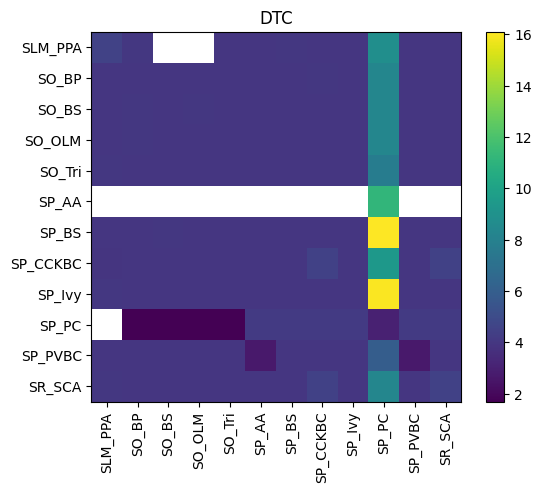

In [84]:
f,ax = plt.subplots()
plt.imshow(mtype_adj)
plt.colorbar()
_=plt.xticks(np.arange(12))
_=plt.yticks(np.arange(12))
_=ax.set_xticklabels(mtypes)
_=ax.set_yticklabels(mtypes)
_=plt.xticks(rotation=90)
plt.title('DTC')

(array([ 88., 105., 128., 121., 132., 128., 148., 150., 136.,  89.]),
 array([3.95020986, 4.06009514, 4.16998043, 4.27986572, 4.38975101,
        4.49963629, 4.60952158, 4.71940687, 4.82929215, 4.93917744,
        5.04906273]),
 <BarContainer object of 10 artists>)

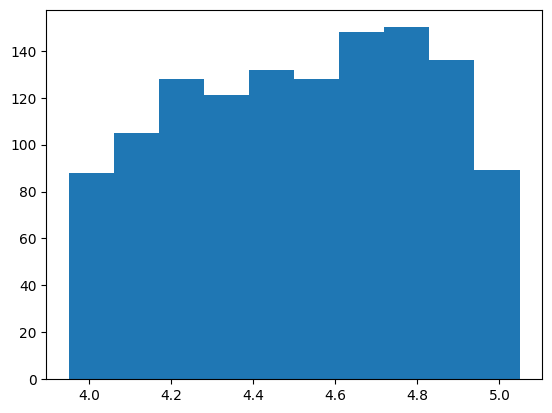

In [69]:
plt.hist(cur_matrix.data)